In [1]:
!pip install mord

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from mord import LogisticIT
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, roc_auc_score)

from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=38ca3b7faab84d1e367f0e346f0183a0548f6f2834a02d8d9584c18fdbeb6e9b
  Stored in directory: /root/.cache/pip/wheels/80/3e/3b/13f1adf346cad0fec675db328e4b0d814795c6c8e2fb659122
Successfully built mord


In [2]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

# **EDA**

In [3]:
df.head(20) #Checking the first 5 rows

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [4]:
df.shape #Getting the number of rows and columns

(1014, 7)

In [5]:
df.isnull().sum() #Checking for missing values

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [6]:
df.info() #Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
df.describe() #Statistics (count, mean, max )

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
df.describe(include='all') #numerical and non-numerical (categorical) ones.

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,low risk
freq,NaN,NaN,NaN,NaN,NaN,NaN,406
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,NaN
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,NaN
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,NaN
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,NaN
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,NaN
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,NaN


# **VISUALIZATIONS**

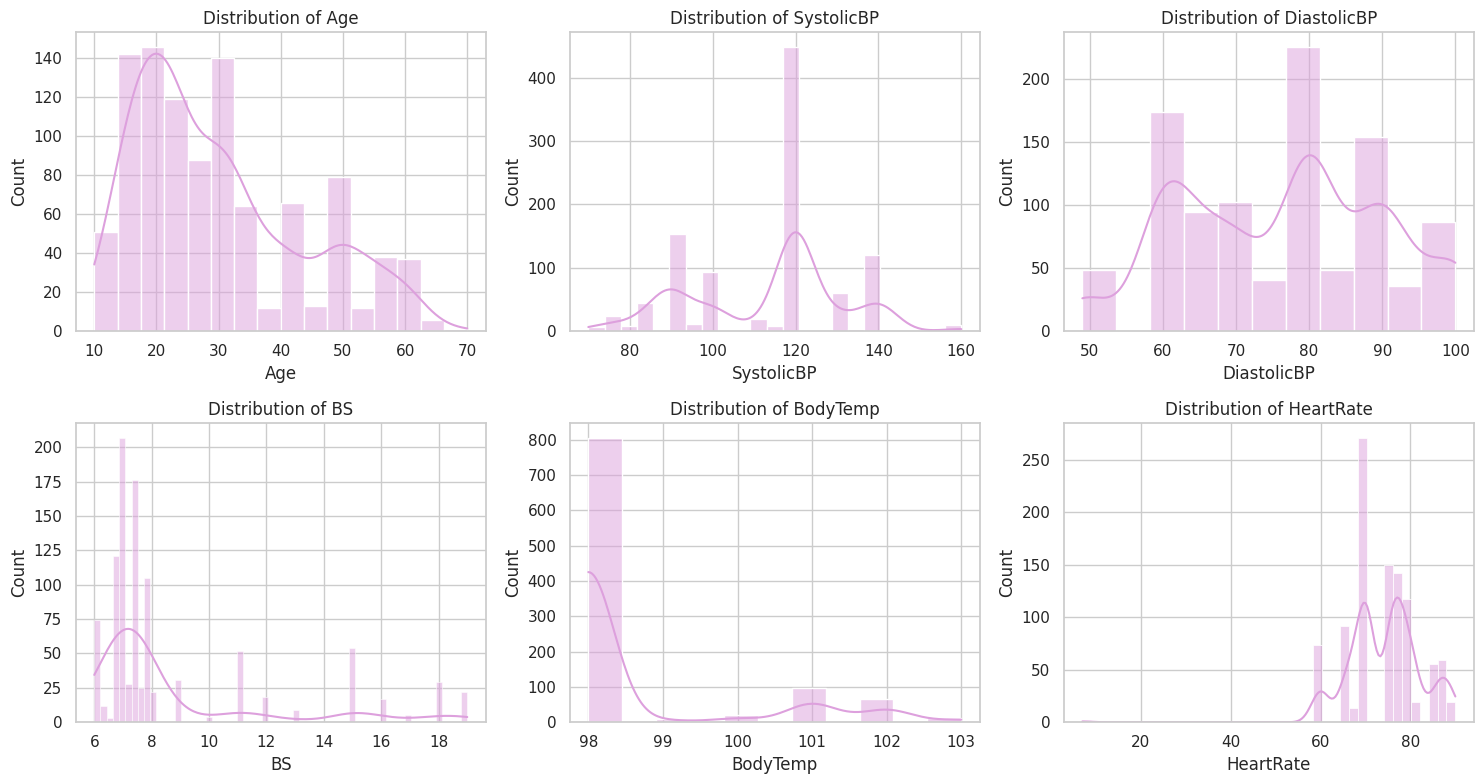

In [9]:
## Basic distribution plots (histograms) for numeric features
sns.set_theme(style="whitegrid")
custom_colors = ["#DDA0DD", "#FFB6C1", "#B19CD9", "#F4A7B9", "#C3B1E1", "#E6A8D7"]
sns.set_palette(custom_colors)

num_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


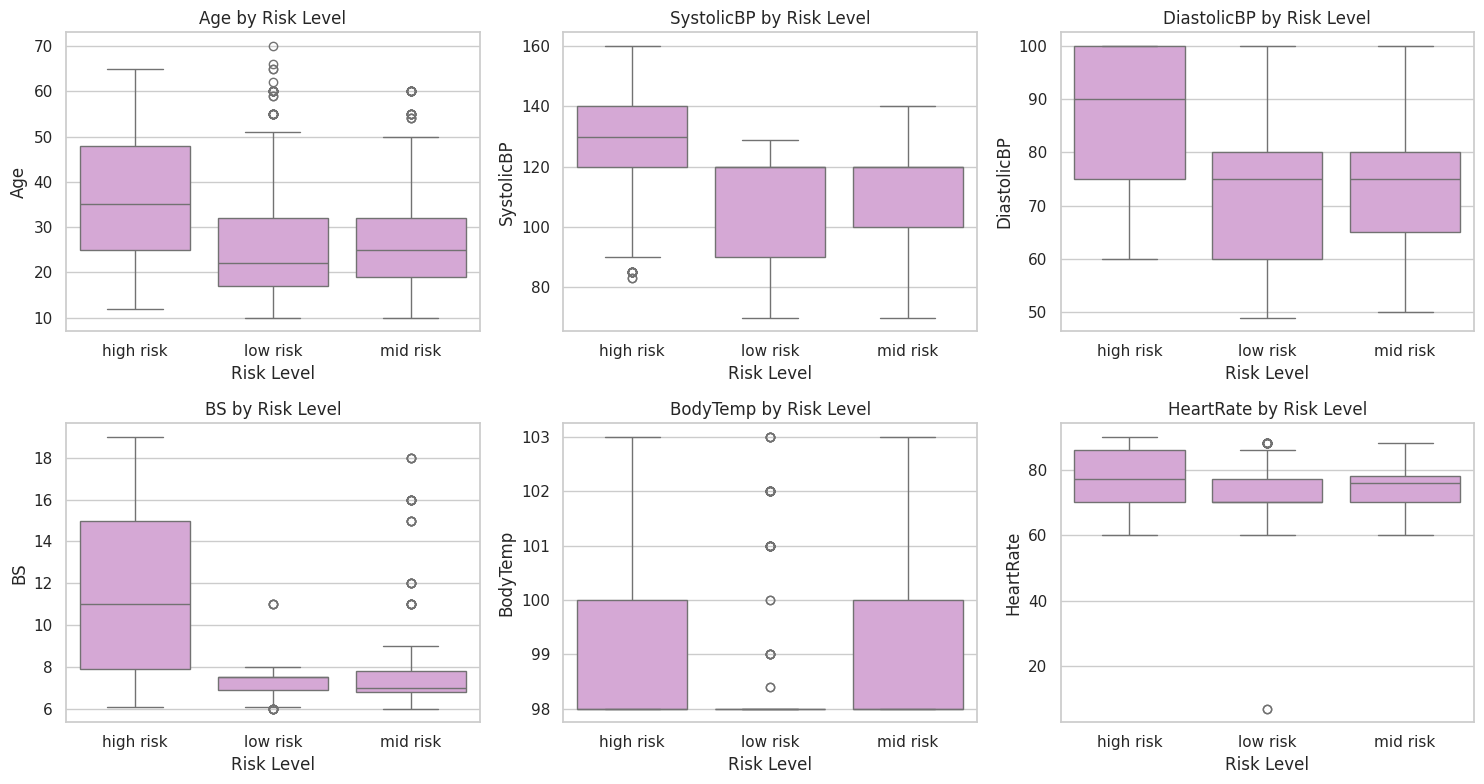

In [10]:
## Boxplots of each variable by RiskLevel
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='RiskLevel', y=col)
    plt.title(f'{col} by Risk Level')
    plt.xlabel('Risk Level')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


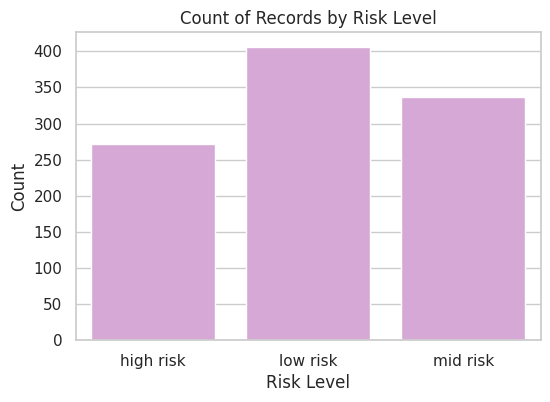

In [11]:
## Countplot for RiskLevel (class balance)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='RiskLevel')
plt.title('Count of Records by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

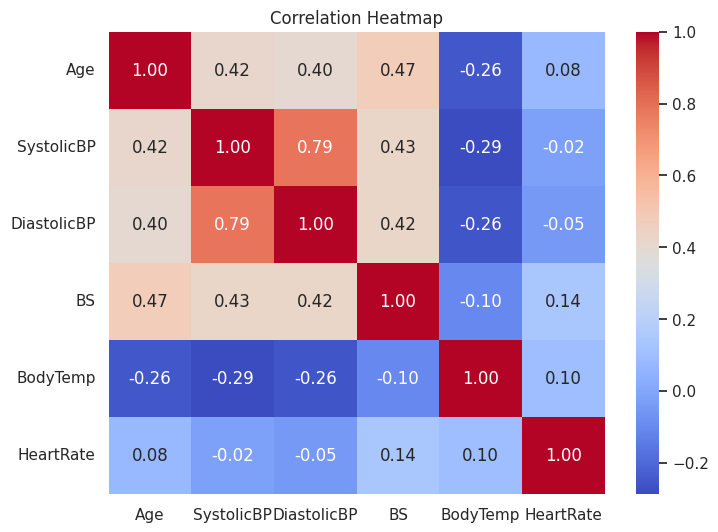

In [12]:
## Correlation heatmap for numeric variables
plt.figure(figsize=(8, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

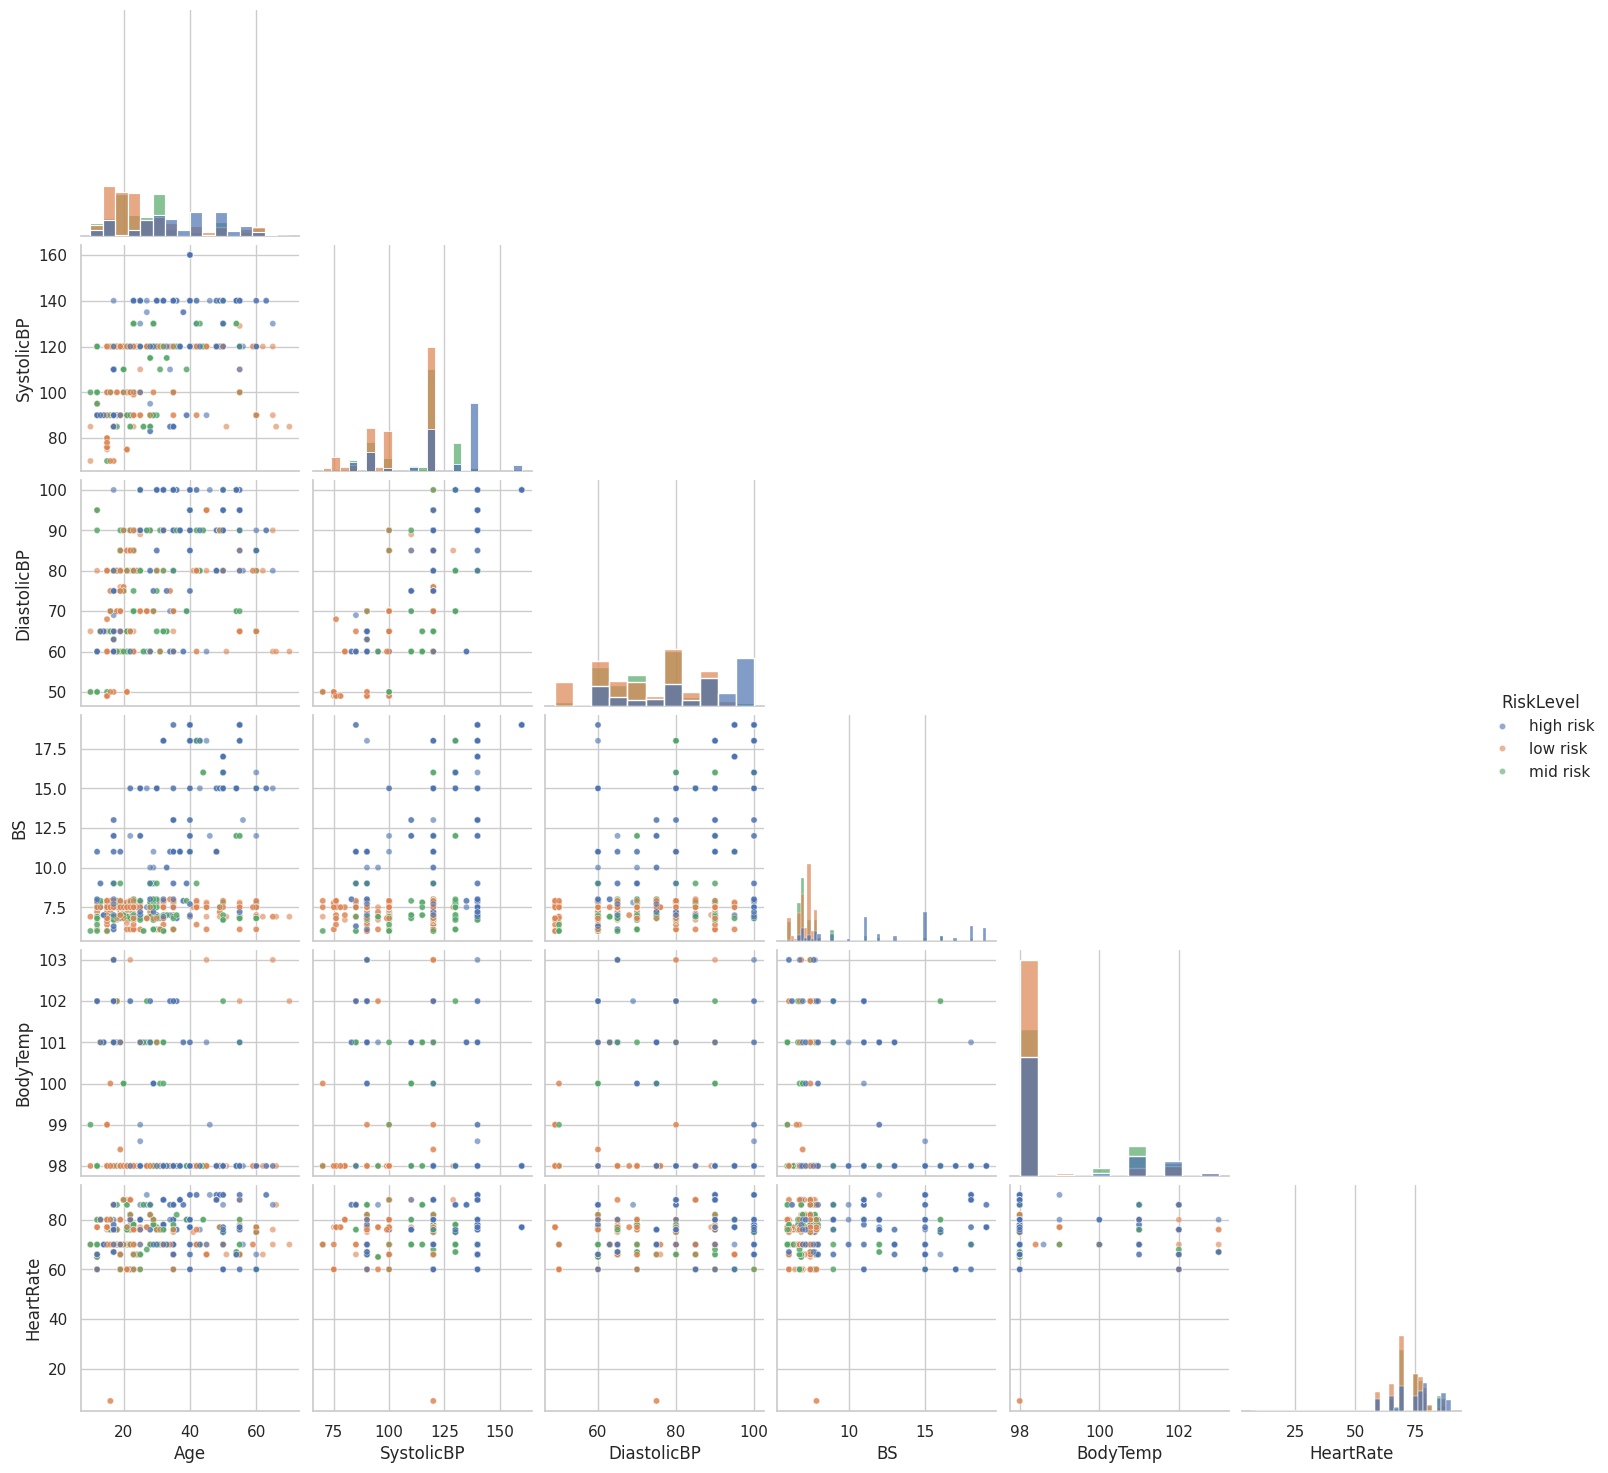

In [13]:
sns.set_theme(style="whitegrid")

grid = sns.pairplot(
    df[num_cols + ['RiskLevel']],
    hue='RiskLevel',
    diag_kind="hist",
    corner=True,
    plot_kws={"s": 20, "alpha": 0.6},
    diag_kws={"alpha": 0.7}
)

plt.show()

# **FEATURE ENGINEERING**

In [14]:
# =====================
# Feature Engineering
# =====================

# Pulse pressure & MAP
df['PulsePressure'] = df['SystolicBP'] - df['DiastolicBP']
df['MAP'] = df['DiastolicBP'] + df['PulsePressure'] / 3

# Flags
df['HighBP'] = (df['SystolicBP'] > 140).astype(int)
df['HighSugar'] = (df['BS'] > 140).astype(int)

# Stress features
df['HeartStress'] = df['HeartRate'] / df['Age']

# Temperature deviation
df['TempDeviation'] = df['BodyTemp'] - df['BodyTemp'].mean()

# Categorical features
df['AgeGroup'] = pd.cut(df['Age'], bins=[10, 20, 35, 50],
                        labels=['teen', 'adult', 'older'])

df['BP_Category'] = pd.cut(df['SystolicBP'], bins=[0, 120, 140, 200],
                           labels=['normal', 'elevated', 'high'])

df['PulseRisk'] = pd.cut(df['PulsePressure'], bins=[0, 30, 50, 120],
                         labels=['low', 'normal', 'high'])

# Ensure categorical dtype
df['AgeGroup'] = df['AgeGroup'].astype('category')
df['BP_Category'] = df['BP_Category'].astype('category')
df['PulseRisk'] = df['PulseRisk'].astype('category')


In [15]:
le = LabelEncoder()
df['RiskLevel'] = le.fit_transform(df['RiskLevel'])

y = df['RiskLevel']
X = df.drop(columns=['RiskLevel'])


In [16]:
numeric_features = X.select_dtypes(include=['int64','float64','float32']).columns.tolist()
categorical_features = X.select_dtypes(include=['object','category']).columns.tolist()

print("NUMERIC:", numeric_features)
print("CATEGORICAL:", categorical_features)


NUMERIC: ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'PulsePressure', 'MAP', 'HighBP', 'HighSugar', 'HeartStress', 'TempDeviation']
CATEGORICAL: ['AgeGroup', 'BP_Category', 'PulseRisk']


In [17]:
poly_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS']

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,PulsePressure,MAP,HighBP,HighSugar,HeartStress,TempDeviation,AgeGroup,BP_Category,PulseRisk
0,25,130,80,15.0,98.0,86,0,50,96.666667,0,0,3.440000,-0.665089,adult,elevated,normal
1,35,140,90,13.0,98.0,70,0,50,106.666667,0,0,2.000000,-0.665089,adult,elevated,normal
2,29,90,70,8.0,100.0,80,0,20,76.666667,0,0,2.758621,1.334911,adult,normal,low
3,30,140,85,7.0,98.0,70,0,55,103.333333,0,0,2.333333,-0.665089,adult,elevated,high
4,35,120,60,6.1,98.0,76,1,60,80.000000,0,0,2.171429,-0.665089,adult,normal,high


# **LOGISTIC REGRESSION**

In [20]:
df_log = df.drop(columns=['Cluster'], errors='ignore').copy()

cat_cols = ['AgeGroup', 'BP_Category', 'PulseRisk']
df_log = pd.get_dummies(df_log, columns=cat_cols, drop_first=True, dtype=int)

y_log = df_log['RiskLevel']
X_log = df_log.drop(columns=['RiskLevel'])

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42, stratify=y_log
)

logit_reg = LogisticRegression(
    penalty="l2",
    C=1e42,
    solver='liblinear',
    multi_class='ovr'
)

logit_reg.fit(X_train_log, y_train_log)
print("Intercept:\n", logit_reg.intercept_, "\n")

coef_df = pd.DataFrame({
    "Coefficient": logit_reg.coef_[0]
}, index=X_train_log.columns)

print("Coefficients:")
print(coef_df)
logit_pred = logit_reg.predict(X_test_log)

print("\nLOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test_log, logit_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_log, logit_pred))
print("\nClassification Report:\n", classification_report(y_test_log, logit_pred))


Intercept:
 [-0.00816365  0.00658375 -0.00181267] 

Coefficients:
                      Coefficient
Age                     -0.050838
SystolicBP              -0.016432
DiastolicBP              0.031988
BS                       0.450655
BodyTemp                -0.083320
HeartRate                0.060004
PulsePressure           -0.048421
MAP                      0.015848
HighBP                   1.667329
HighSugar                0.000000
HeartStress             -0.541225
TempDeviation            0.722147
AgeGroup_adult           0.388066
AgeGroup_older           0.440728
BP_Category_elevated     2.620324
BP_Category_high         1.667329
PulseRisk_normal         1.011570
PulseRisk_high           0.525737

LOGISTIC REGRESSION RESULTS
Accuracy: 0.6699507389162561

Confusion Matrix:
 [[43  5  7]
 [ 3 73  5]
 [ 5 42 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        55
           1       0.61      0.90      

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


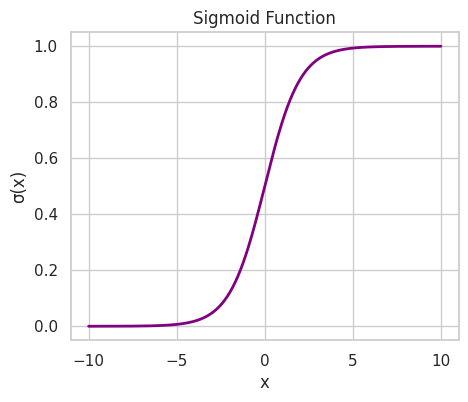

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-x))

plt.figure(figsize=(5,4))
plt.plot(x, sigmoid, color='purple', linewidth=2)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.show()


In [22]:
from sklearn.preprocessing import LabelEncoder

df['RiskLevel'] = LabelEncoder().fit_transform(df['RiskLevel'])

In [23]:
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

X_encoded = pd.get_dummies(X, drop_first=True)


In [24]:
df.dtypes


,0
Age,int64
SystolicBP,int64
DiastolicBP,int64
BS,float64
BodyTemp,float64
HeartRate,int64
RiskLevel,int64
PulsePressure,int64
MAP,float64
HighBP,int64


In [25]:
# Identify categorical columns
cat_cols = ['AgeGroup', 'BP_Category', 'PulseRisk']

# Convert categories to one-hot columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Target + predictors
y_rf = df_encoded['RiskLevel']
X_rf = df_encoded.drop(columns=['RiskLevel'])


CROSS VALIDATION

==== CROSS VALIDATION ====
Fold Accuracies: [0.8817734  0.71921182 0.81280788 0.73891626 0.7970297 ]
Mean CV Accuracy: 0.7899478125152417

Fold Macro Recall: [0.88421975 0.73461648 0.81741024 0.74782135 0.79795467]
Mean CV Macro Recall: 0.7964044989447626

==== FINAL TEST RESULTS ====
Accuracy: 0.7832512315270936

Confusion Matrix:
[[48  2  5]
 [ 0 70 11]
 [ 2 24 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.73      0.86      0.79        81
           2       0.72      0.61      0.66        67

    accuracy                           0.78       203
   macro avg       0.80      0.78      0.79       203
weighted avg       0.79      0.78      0.78       203


Top 10 Important Features:
BS                      0.273076
MAP                     0.115535
SystolicBP              0.114345
HeartStress             0.081021
Age                     0.073556
DiastolicBP             0.06272

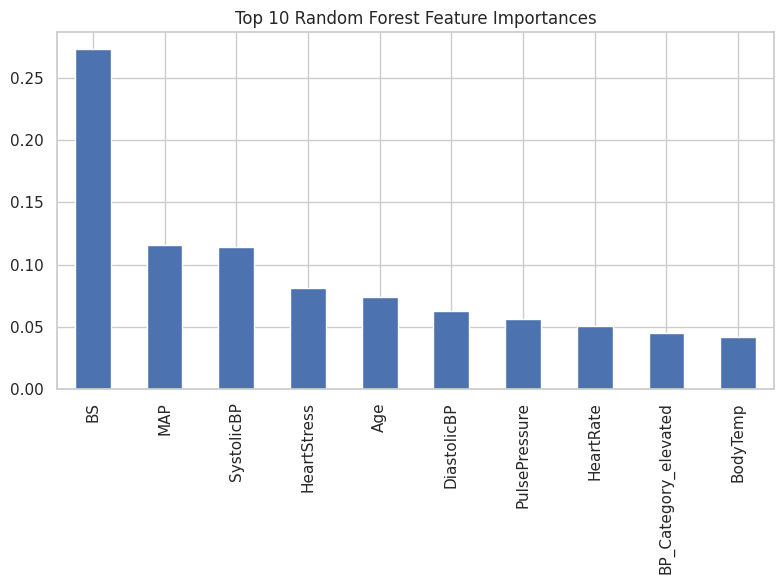

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ----------------------------
# 1. ENCODE CATEGORICAL COLUMNS
# ----------------------------

cat_cols = ['AgeGroup', 'BP_Category', 'PulseRisk']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Target and predictors
y_rf = df_encoded['RiskLevel']
X_rf = df_encoded.drop(columns=['RiskLevel'])

# ----------------------------
# 2. CROSS-VALIDATION (before train/test)
# ----------------------------

rf_base = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

# Accuracy CV
cv_acc = cross_val_score(rf_base, X_rf, y_rf, cv=5, scoring='accuracy')
print("==== CROSS VALIDATION ====")
print("Fold Accuracies:", cv_acc)
print("Mean CV Accuracy:", cv_acc.mean())

# Macro Recall CV
cv_recall = cross_val_score(rf_base, X_rf, y_rf, cv=5, scoring='recall_macro')
print("\nFold Macro Recall:", cv_recall)
print("Mean CV Macro Recall:", cv_recall.mean())

# ----------------------------
# 3. FINAL TRAIN/TEST SPLIT
# ----------------------------

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf
)

# ----------------------------
# 4. TRAIN FINAL RANDOM FOREST
# ----------------------------

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train_rf, y_train_rf)
rf_pred = rf.predict(X_test_rf)

# ----------------------------
# 5. EVALUATION ON TEST SET
# ----------------------------

print("\n==== FINAL TEST RESULTS ====")
print("Accuracy:", accuracy_score(y_test_rf, rf_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, rf_pred))

print("\nClassification Report:")
print(classification_report(y_test_rf, rf_pred))

# ----------------------------
# 6. FEATURE IMPORTANCE PLOT
# ----------------------------

importances = pd.Series(
    rf.feature_importances_,
    index=X_train_rf.columns
).sort_values(ascending=False)

print("\nTop 10 Important Features:")
print(importances.head(10))

plt.figure(figsize=(8, 6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Random Forest Feature Importances")
plt.tight_layout()
plt.show()


##Random Forest

With feature enginerring

RANDOM FOREST RESULTS
Accuracy: 0.7832512315270936

Confusion Matrix:
 [[48  2  5]
 [ 0 70 11]
 [ 2 24 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.73      0.86      0.79        81
           2       0.72      0.61      0.66        67

    accuracy                           0.78       203
   macro avg       0.80      0.78      0.79       203
weighted avg       0.79      0.78      0.78       203


Top 10 Important Features:
BS                      0.273076
MAP                     0.115535
SystolicBP              0.114345
HeartStress             0.081021
Age                     0.073556
DiastolicBP             0.062722
PulsePressure           0.056025
HeartRate               0.050545
BP_Category_elevated    0.044802
BodyTemp                0.041838
dtype: float64


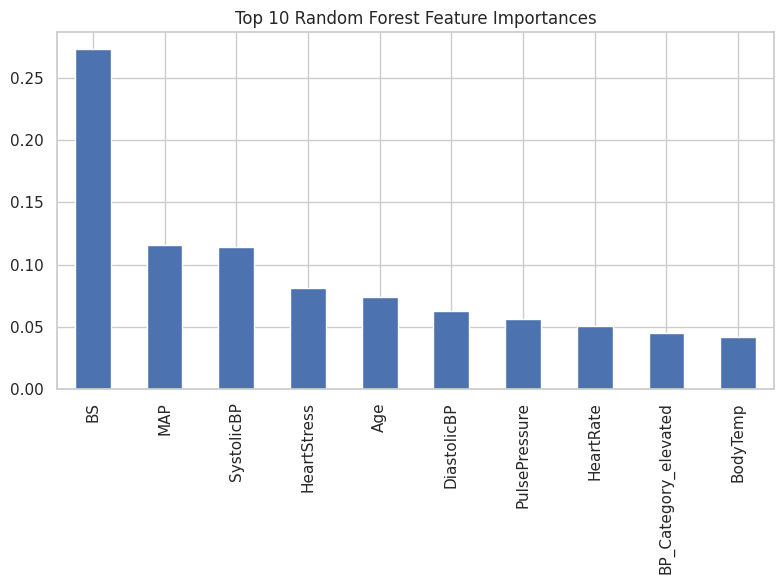

In [27]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf
)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train_rf, y_train_rf)
rf_pred = rf.predict(X_test_rf)

print("RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test_rf, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, rf_pred))
print("\nClassification Report:\n", classification_report(y_test_rf, rf_pred))

# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=X_train_rf.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

plt.figure(figsize=(8, 6))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Random Forest Feature Importances")
plt.tight_layout()
plt.show()


Without feature enginerring

RANDOM FOREST (NO FEATURE ENGINEERING)
Accuracy: 0.8078817733990148

Confusion Matrix:
 [[50  2  3]
 [ 0 69 12]
 [ 2 20 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        55
           1       0.76      0.85      0.80        81
           2       0.75      0.67      0.71        67

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.81      0.81      0.81       203


Top 10 Important Features:
BS             0.344795
SystolicBP     0.227036
Age            0.137115
DiastolicBP    0.123321
HeartRate      0.090997
BodyTemp       0.076735
dtype: float64


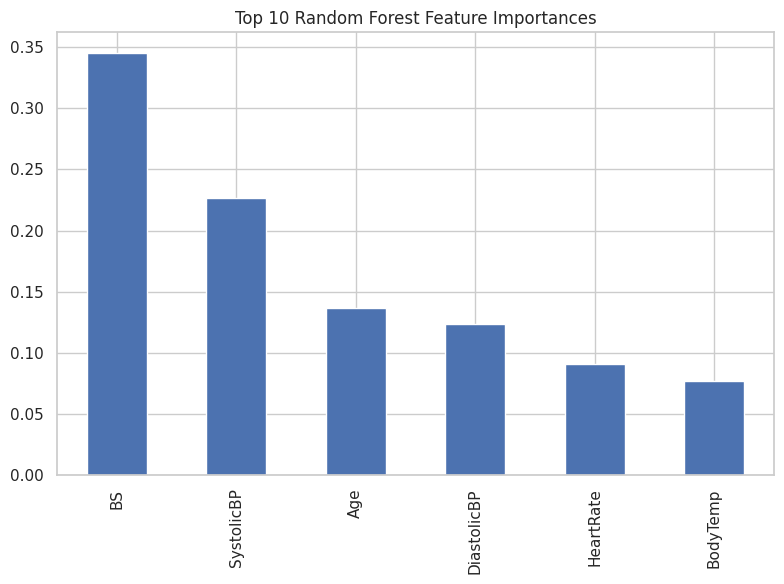

In [28]:

df_raw = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

le = LabelEncoder()
df_raw['RiskLevel'] = le.fit_transform(df_raw['RiskLevel'])

num_cols_raw = df_raw.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols_raw = df_raw.select_dtypes(include=['object','category']).columns.tolist()

df_raw_encoded = pd.get_dummies(df_raw, columns=cat_cols_raw, drop_first=True)

y_raw = df_raw_encoded['RiskLevel']
X_raw = df_raw_encoded.drop(columns=['RiskLevel'])

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

rf_raw = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf_raw.fit(X_train_raw, y_train_raw)
rf_raw_pred = rf_raw.predict(X_test_raw)

print("RANDOM FOREST (NO FEATURE ENGINEERING)")
print("Accuracy:", accuracy_score(y_test_raw, rf_raw_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_raw, rf_raw_pred))
print("\nClassification Report:\n", classification_report(y_test_raw, rf_raw_pred))

importances_raw = pd.Series(
    rf_raw.feature_importances_,
    index=X_train_raw.columns
).sort_values(ascending=False)

print("\nTop 10 Important Features:")
print(importances_raw.head(10))

plt.figure(figsize=(8, 6))
importances_raw.head(10).plot(kind='bar')
plt.title("Top 10 Random Forest Feature Importances")
plt.tight_layout()
plt.show()


##SVM modeling

In [29]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True
)

svm.fit(X_train_rf, y_train_rf)

svm_pred = svm.predict(X_test_rf)

print("SVM RESULTS")
print("Accuracy:", accuracy_score(y_test_rf, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, svm_pred))
print("\nClassification Report:\n", classification_report(y_test_rf, svm_pred))


SVM RESULTS
Accuracy: 0.5911330049261084

Confusion Matrix:
 [[29 17  9]
 [ 0 63 18]
 [ 1 38 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.53      0.68        55
           1       0.53      0.78      0.63        81
           2       0.51      0.42      0.46        67

    accuracy                           0.59       203
   macro avg       0.67      0.57      0.59       203
weighted avg       0.64      0.59      0.59       203



##XGBOOST

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dtrain = xgb.DMatrix(X_train_rf, label=y_train_rf)
dtest = xgb.DMatrix(X_test_rf, label=y_test_rf)

params = {
    "objective": "multi:softmax",
    "num_class": 3,
    "eval_metric": "mlogloss",
    "eta": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200
)

xgb_pred = xgb_model.predict(dtest)

print("XGBOOST RESULTS")
print("Accuracy:", accuracy_score(y_test_rf, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test_rf, xgb_pred))


XGBOOST RESULTS
Accuracy: 0.8620689655172413

Confusion Matrix:
 [[50  0  5]
 [ 2 66 13]
 [ 2  6 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.92      0.81      0.86        81
           2       0.77      0.88      0.82        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203



**TRAIN & EVALUATE MODELS (WITHOUT FEATURE ENGINEERING)**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier   # if you use XGBoost

# 1. Drop Cluster everywhere (if it exists)
df_no_cluster = df_encoded.drop(columns=['Cluster'], errors='ignore')

# 2. Define X and y
y_no_fe = df_no_cluster['RiskLevel']
X_no_fe = df_no_cluster.drop(columns=['RiskLevel'])


In [32]:
X_train_no_fe, X_test_no_fe, y_train_no_fe, y_test_no_fe = train_test_split(
    X_no_fe, y_no_fe, test_size=0.2, random_state=42, stratify=y_no_fe
)


In [33]:
# Logistic Regression
logit_reg = LogisticRegression(max_iter=1000)
logit_reg.fit(X_train_no_fe, y_train_no_fe)

# SVM
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train_no_fe, y_train_no_fe)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train_no_fe, y_train_no_fe)

# XGBoost (only if you're using it)
# xgb_model = XGBClassifier(random_state=42)
# xgb_model.fit(X_train_no_fe, y_train_no_fe)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------------
# 1. DROP CLUSTER & BUILD X, y
# -----------------------------------
# Use your encoded dataframe here (the one used for models)
# If it's just df, replace df_encoded with df
df_no_cluster = df_encoded.drop(columns=['Cluster'], errors='ignore')

y = df_no_cluster['RiskLevel']
X = df_no_cluster.drop(columns=['RiskLevel'])

# -----------------------------------
# 2. TRAIN/TEST SPLIT
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------------
# 3. FIT MODELS (NO CLUSTER, NO FE)
# -----------------------------------

# Logistic Regression
logit_reg = LogisticRegression(max_iter=1000)
logit_reg.fit(X_train, y_train)
logit_pred = logit_reg.predict(X_test)

# SVM
svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'   # avoids warnings
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# -----------------------------------
# 4. BUILD COMPARISON TABLE
# -----------------------------------
results = []

def add_result(name, y_true, y_pred):
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    })

add_result("Logistic Regression (No FE)", y_test, logit_pred)
add_result("SVM (No FE)", y_test, svm_pred)
add_result("Random Forest (No FE)", y_test, rf_pred)
add_result("XGBoost (No FE)", y_test, xgb_pred)

results_df = pd.DataFrame(results)
results_df.style.set_caption("Model Comparison – WITHOUT Clustering / WITHOUT Feature Engineering")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (No FE),0.684729,0.688898,0.684729,0.665353
1,SVM (No FE),0.591133,0.642963,0.591133,0.589014
2,Random Forest (No FE),0.783251,0.788451,0.783251,0.781576
3,XGBoost (No FE),0.862069,0.867842,0.862069,0.862926


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -----------------------------------
# 1. USE YOUR FEATURE-ENGINEERED DATAFRAME
#    Replace df_encoded with your actual FE dataframe
# -----------------------------------

df_fe_no_cluster = df_encoded.drop(columns=['Cluster'], errors='ignore')

y_fe = df_fe_no_cluster['RiskLevel']
X_fe = df_fe_no_cluster.drop(columns=['RiskLevel'])

# -----------------------------------
# 2. TRAIN/TEST SPLIT
# -----------------------------------
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.2, random_state=42, stratify=y_fe
)

# -----------------------------------
# 3. FIT MODELS (WITH FEATURE ENGINEERING)
# -----------------------------------

# Logistic Regression (FE)
logit_reg_fe = LogisticRegression(max_iter=1000)
logit_reg_fe.fit(X_train_fe, y_train_fe)
logit_fe_pred = logit_reg_fe.predict(X_test_fe)

# SVM (FE)
svm_fe = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm_fe.fit(X_train_fe, y_train_fe)
svm_fe_pred = svm_fe.predict(X_test_fe)

# Random Forest (FE)
rf_fe = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf_fe.fit(X_train_fe, y_train_fe)
rf_fe_pred = rf_fe.predict(X_test_fe)

# XGBoost (FE)
xgb_fe = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_fe.fit(X_train_fe, y_train_fe)
xgb_fe_pred = xgb_fe.predict(X_test_fe)

# -----------------------------------
# 4. BUILD COMPARISON TABLE (WITH FE)
# -----------------------------------
results_fe = []

def add_result_fe(name, y_true, y_pred):
    results_fe.append({
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    })

add_result_fe("Logistic Regression (FE)", y_test_fe, logit_fe_pred)
add_result_fe("SVM (FE)", y_test_fe, svm_fe_pred)
add_result_fe("Random Forest (FE)", y_test_fe, rf_fe_pred)
add_result_fe("XGBoost (FE)", y_test_fe, xgb_fe_pred)

results_fe_df = pd.DataFrame(results_fe)
results_fe_df.style.set_caption("Model Comparison – WITH Feature Engineering (No Clustering)")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (FE),0.684729,0.688898,0.684729,0.665353
1,SVM (FE),0.591133,0.642963,0.591133,0.589014
2,Random Forest (FE),0.783251,0.788451,0.783251,0.781576
3,XGBoost (FE),0.862069,0.867842,0.862069,0.862926


##Clustering

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_features = df[num_cols]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster counts:")
print(df['Cluster'].value_counts())

print("\nCluster vs RiskLevel:")
print(pd.crosstab(df['Cluster'], df['RiskLevel']))


Cluster counts:
Cluster
0    506
2    325
1    183
Name: count, dtype: int64

Cluster vs RiskLevel:
RiskLevel    0    1    2
Cluster                 
0           63  245  198
1          146    5   32
2           63  156  106


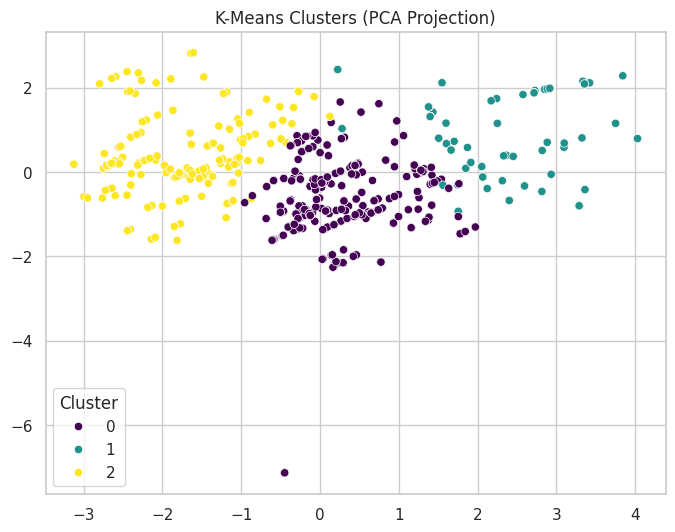

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_coords = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_coords[:, 0],
    y=pca_coords[:, 1],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title("K-Means Clusters (PCA Projection)")
plt.show()


In [38]:
data = df.copy()
data['Cluster'] = df['Cluster']

y_rf = data['RiskLevel']
X_rf = data.drop(columns=['RiskLevel'])

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf
)


## RANDOM FOREST WITH CLUSTER FEATURE


In [39]:
# Fit and transform training data
preprocessor.fit(X_train_rf)

X_train_rf_processed = preprocessor.transform(X_train_rf)
X_test_rf_processed = preprocessor.transform(X_test_rf)

# Train RF
rf2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

rf2.fit(X_train_rf_processed, y_train_rf)

# Predict
rf2_pred = rf2.predict(X_test_rf_processed)

# Evaluate
print("RANDOM FOREST (With Cluster Feature)")
print("Accuracy:", accuracy_score(y_test_rf, rf2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, rf2_pred))
print("\nClassification Report:\n", classification_report(y_test_rf, rf2_pred))



RANDOM FOREST (With Cluster Feature)
Accuracy: 0.812807881773399

Confusion Matrix:
 [[48  2  5]
 [ 0 69 12]
 [ 2 17 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91        55
           1       0.78      0.85      0.82        81
           2       0.74      0.72      0.73        67

    accuracy                           0.81       203
   macro avg       0.83      0.81      0.82       203
weighted avg       0.82      0.81      0.81       203



## XGBOOST WITH CLUSTER FEATURE


In [43]:

import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train_rf2 = pd.get_dummies(X_train_rf, drop_first=True)
X_test_rf2 = pd.get_dummies(X_test_rf, drop_first=True)

X_test_rf2 = X_test_rf2.reindex(columns=X_train_rf2.columns, fill_value=0)

dtrain2 = xgb.DMatrix(X_train_rf2, label=y_train_rf)
dtest2 = xgb.DMatrix(X_test_rf2, label=y_test_rf)

xgb_model2 = xgb.train(
    params={
        "objective": "multi:softmax",
        "num_class": 3,
        "eval_metric": "mlogloss",
        "eta": 0.1,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "seed": 42
    },
    dtrain=dtrain2,
    num_boost_round=200
)

# Predict
xgb_pred2 = xgb_model2.predict(dtest2)

# Results
print("XGBOOST (With Cluster Feature) — Numeric Only")
print("Accuracy:", accuracy_score(y_test_rf, xgb_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, xgb_pred2))
print("\nClassification Report:\n", classification_report(y_test_rf, xgb_pred2))


XGBOOST (With Cluster Feature) — Numeric Only
Accuracy: 0.8669950738916257

Confusion Matrix:
 [[50  1  4]
 [ 2 67 12]
 [ 2  6 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        55
           1       0.91      0.83      0.86        81
           2       0.79      0.88      0.83        67

    accuracy                           0.87       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.87      0.87       203



##Comparison Chart

In [46]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

logit_pred = logit_reg.predict(X_test_log)

results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test_log, logit_pred),
    "Precision": precision_score(y_test_log, logit_pred, average='weighted'),
    "Recall": recall_score(y_test_log, logit_pred, average='weighted'),
    "F1-Score": f1_score(y_test_log, logit_pred, average='weighted')
})

svm = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm.fit(X_train_rf2, y_train_rf)
svm_pred = svm.predict(X_test_rf2)

results.append({
    "Model": "SVM (With Cluster)",
    "Accuracy": accuracy_score(y_test_rf, svm_pred),
    "Precision": precision_score(y_test_rf, svm_pred, average='weighted'),
    "Recall": recall_score(y_test_rf, svm_pred, average='weighted'),
    "F1-Score": f1_score(y_test_rf, svm_pred, average='weighted')
})

results.append({
    "Model": "XGBoost (With Cluster)",
    "Accuracy": accuracy_score(y_test_rf, xgb_pred2),
    "Precision": precision_score(y_test_rf, xgb_pred2, average='weighted'),
    "Recall": recall_score(y_test_rf, xgb_pred2, average='weighted'),
    "F1-Score": f1_score(y_test_rf, xgb_pred2, average='weighted')
})


rf2.fit(X_train_rf2, y_train_rf)
rf2_pred = rf2.predict(X_test_rf2)

results.append({
    "Model": "Random Forest (With Cluster)",
    "Accuracy": accuracy_score(y_test_rf, rf2_pred),
    "Precision": precision_score(y_test_rf, rf2_pred, average='weighted'),
    "Recall": recall_score(y_test_rf, rf2_pred, average='weighted'),
    "F1-Score": f1_score(y_test_rf, rf2_pred, average='weighted')
})


# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.style.set_caption("Model Comparison Table – Numeric Only (With Cluster)")




,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.684729,0.688898,0.684729,0.665353
1,SVM (With Cluster),0.586207,0.640862,0.586207,0.583501
2,XGBoost (With Cluster),0.866995,0.871776,0.866995,0.867786
3,Random Forest (With Cluster),0.778325,0.783797,0.778325,0.776211


##ROC Curve

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


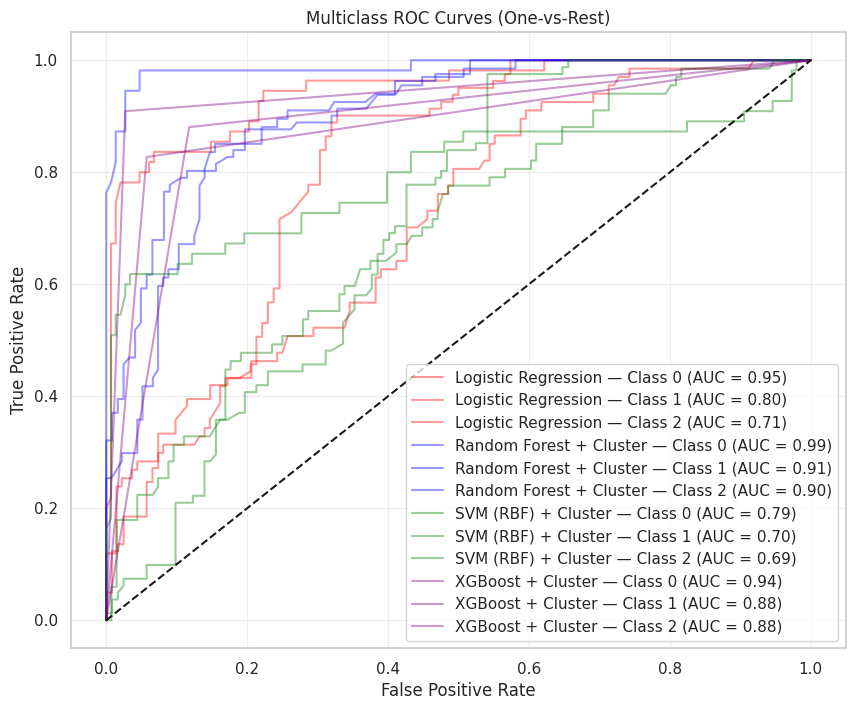

In [48]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

classes = [0, 1, 2]
y_test_bin = label_binarize(y_test_rf, classes=classes)
n_classes = y_test_bin.shape[1]


def ensure_prob_matrix(y, n_classes):
    y = np.asarray(y)
    if y.ndim == 1:
        y_fixed = np.zeros((y.size, n_classes))
        for idx, cls in enumerate(y):
            y_fixed[idx, int(cls)] = 1
        return y_fixed
    return y


# ---------------------------------------------------------
# LOGISTIC REGRESSION (no cluster)
# ---------------------------------------------------------
logit_ovr = OneVsRestClassifier(
    LogisticRegression(
        penalty="l2",
        C=1e42,
        solver='liblinear',
        multi_class='ovr'
    )
)
logit_ovr.fit(X_train_log, y_train_log)
y_score_log = ensure_prob_matrix(logit_ovr.predict_proba(X_test_log), n_classes)


# ---------------------------------------------------------
# RANDOM FOREST + CLUSTER — FIXED TO USE X_train_rf2
# ---------------------------------------------------------
rf_ovr = OneVsRestClassifier(rf2)
rf_ovr.fit(X_train_rf2, y_train_rf)
y_score_rf = ensure_prob_matrix(rf_ovr.predict_proba(X_test_rf2), n_classes)


# ---------------------------------------------------------
# SVM (RBF) + CLUSTER — FIXED TO USE X_train_rf2
# ---------------------------------------------------------
svm_roc = SVC(kernel='rbf', C=1, gamma='scale', probability=True)
svm_roc.fit(X_train_rf2, y_train_rf)
y_score_svm = ensure_prob_matrix(svm_roc.predict_proba(X_test_rf2), n_classes)


# ---------------------------------------------------------
# XGBOOST + CLUSTER (already numeric)
# ---------------------------------------------------------
y_score_xgb = xgb_model2.predict(xgb.DMatrix(X_test_rf2))
y_score_xgb = ensure_prob_matrix(y_score_xgb, n_classes)


# ---------------------------------------------------------
# MULTICLASS ROC PLOT
# ---------------------------------------------------------
plt.figure(figsize=(10, 8))

model_scores = [
    ("Logistic Regression", y_score_log),
    ("Random Forest + Cluster", y_score_rf),
    ("SVM (RBF) + Cluster", y_score_svm),
    ("XGBoost + Cluster", y_score_xgb)
]

colors = ['red', 'blue', 'green', 'purple']

for (name, y_score), color in zip(model_scores, colors):
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(
            fpr, tpr, color=color, alpha=0.4,
            label=f"{name} — Class {i} (AUC = {roc_auc:.2f})"
        )

plt.plot([0,1], [0,1], 'k--')
plt.title("Multiclass ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
